In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#importing MNIST Handwritten Dataset for Classification Problem
from keras.datasets import mnist

#Dividing the dataset containing images and their corresponding labels into Training Set and Test Set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


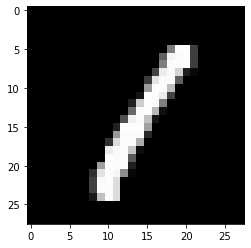

In [4]:
#Looking at one of the images from the dataset
plt.imshow(x_train[3], cmap = 'gray')

In [10]:
#Creating a Class for performing K - Nearest Neighbour(KNN) for Classifying Images

class NewKNN:
  def __init__(self, neighbours = 5):
    self.neighbours = neighbours

  def fit(self, X, y):
    self.X = (X - X.mean()) / X.std()           #Converting the data in Standard Normal Variate
    self.y = y

  def prediction(self, image):
    list_dist = []
    for x_point, y_point in zip(self.X, self.y):
      distance = ((image - x_point) ** 2).sum() #Calculating the Euclidean Distance between every image in the dataset 
      list_dist.append([distance, y_point])

    sorted_distance = sorted(list_dist)         #Sorting the list of distances in ascending order
    top_k = sorted_distance[:self.neighbours]

    items, counts = np.unique(np.array(top_k)[:, 1], return_counts = True)
    ans = items[np.argmax(counts)]
    return ans

  def predict(self, X):
      results = []
      X = (X - X.mean()) / X.std()
      for point in X:
        results.append(self.prediction(point))
      return np.array(results, dtype = int)

  def score(self, X, y):
      return sum(self.predict(X) == y) / len(y)

In [11]:
knn = NewKNN()                       
knn.fit(x_train, y_train)

In [13]:
knn.predict(x_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

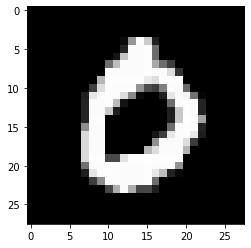

In [14]:
plt.imshow(x_test[3], cmap = 'gray')     #The image of the 4th datapoint in the dataset which matches with the label predicted

In [16]:
knn.score(x_test[:50], y_test[:50])

0.98

# ***The Accuracy of our KNN Classifier is 98% on the given training set***